<a href="https://colab.research.google.com/github/TanmayLimje/Machine-Learning/blob/main/MLlab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/Admission_Predict.csv")

In [3]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [5]:
df["Chance of Admit "]=df["Chance of Admit "].apply(lambda x: 1 if x>0.5 else 0)

In [6]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1
2,3,316,104,3,3.0,3.5,8.00,1,1
3,4,322,110,3,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,1
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,1
396,397,325,107,3,3.0,3.5,9.11,1,1
397,398,330,116,4,5.0,4.5,9.45,1,1
398,399,312,103,3,3.5,4.0,8.78,0,1


In [8]:
data_admit = df[df['Chance of Admit ']==1]
data_non_admit = df[df['Chance of Admit ']==0]
print("Admitted count       : " ,data_admit.shape[0])
print("Non - Admitted count : " ,data_non_admit.shape[0])

Admitted count       :  365
Non - Admitted count :  35


In [9]:
print("maximum GRE Score : ",df['GRE Score'].max())
print("minimum GRE Score : ",df['GRE Score'].min())

maximum GRE Score :  340
minimum GRE Score :  290


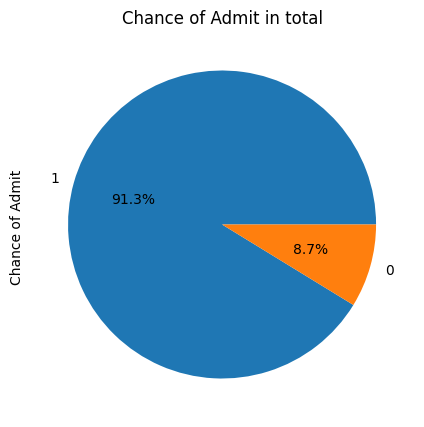

In [10]:
df['Chance of Admit '].value_counts().plot(kind='pie',figsize=(5,5),autopct='%1.1f%%')
plt.title("Chance of Admit in total")
plt.show()

In [12]:
X= df.drop("Chance of Admit ",axis =1 )
y= df["Chance of Admit "]

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state=42)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(320, 8) (320,)
(80, 8) (80,)


In [14]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [15]:
y_train_tree = tree.predict(X_train)
y_test_tree = tree.predict(X_test)


In [16]:
from sklearn.metrics import accuracy_score

acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree : Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree : Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree : Accuracy on training Data: 1.000
Decision Tree : Accuracy on test Data: 0.912


In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_tree))

              precision    recall  f1-score   support

           0       0.67      0.60      0.63        10
           1       0.94      0.96      0.95        70

    accuracy                           0.91        80
   macro avg       0.81      0.78      0.79        80
weighted avg       0.91      0.91      0.91        80



In [19]:
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=3)

tree.fit(X_train, y_train)
text_representation = export_text(tree)
print(text_representation)

|--- feature_6 <= 7.66
|   |--- feature_1 <= 301.00
|   |   |--- feature_5 <= 2.75
|   |   |   |--- class: 0
|   |   |--- feature_5 >  2.75
|   |   |   |--- class: 0
|   |--- feature_1 >  301.00
|   |   |--- feature_2 <= 97.50
|   |   |   |--- class: 0
|   |   |--- feature_2 >  97.50
|   |   |   |--- class: 1
|--- feature_6 >  7.66
|   |--- feature_0 <= 97.50
|   |   |--- feature_1 <= 312.50
|   |   |   |--- class: 0
|   |   |--- feature_1 >  312.50
|   |   |   |--- class: 1
|   |--- feature_0 >  97.50
|   |   |--- feature_0 <= 386.00
|   |   |   |--- class: 1
|   |   |--- feature_0 >  386.00
|   |   |   |--- class: 1



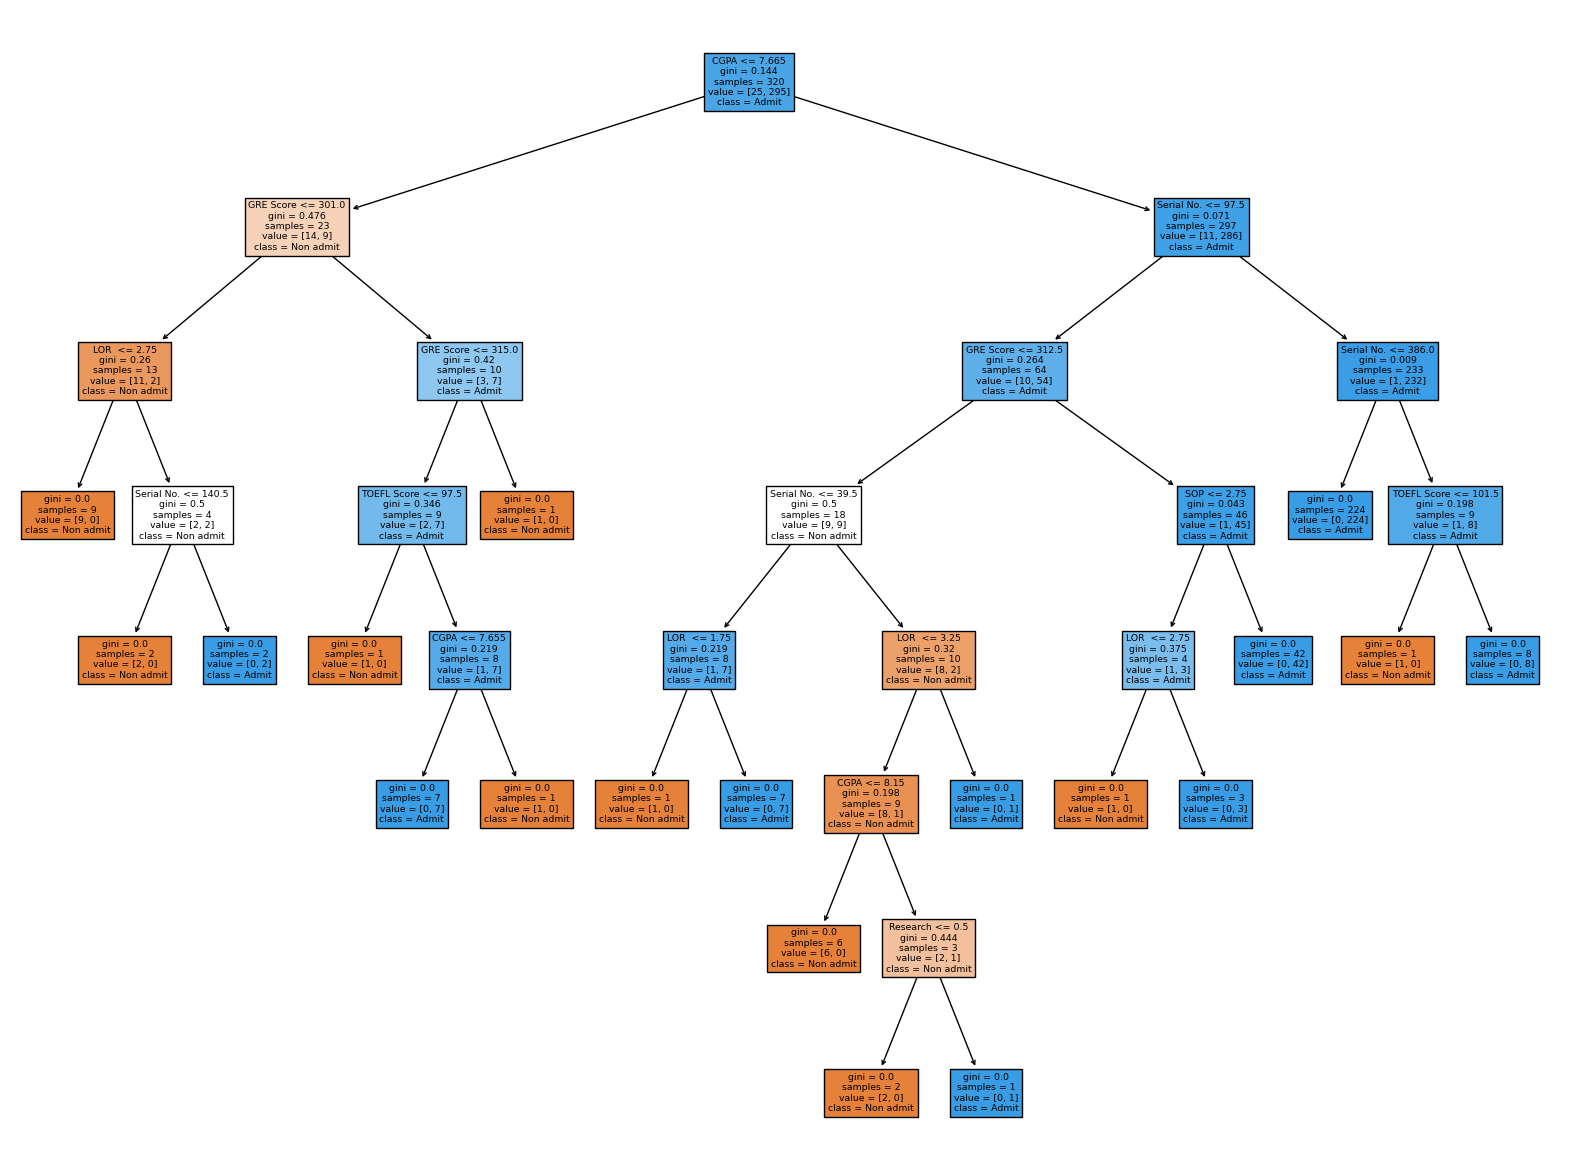

In [18]:
import sklearn.tree as tr
fig = plt.figure(figsize=(20,15))
_ = tr.plot_tree(tree,
                 feature_names=X.columns,
                 class_names=np.array(["Non admit","Admit"]),
                 filled=True)